In [1]:
#import used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
#load dataset
df = pd.read_csv(r"/hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
#show statistics info
print("this is general information about the dataset")
df.info()
print("this is statistics information about the dataset")
df.describe()

this is general information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [4]:
#Identify all missing values.
missing_values=df.isnull().sum()
print(missing_values)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
#calculate percentage of missing values
percent_missing=df.isnull().sum()/len(df)*100
print(percent_missing)

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

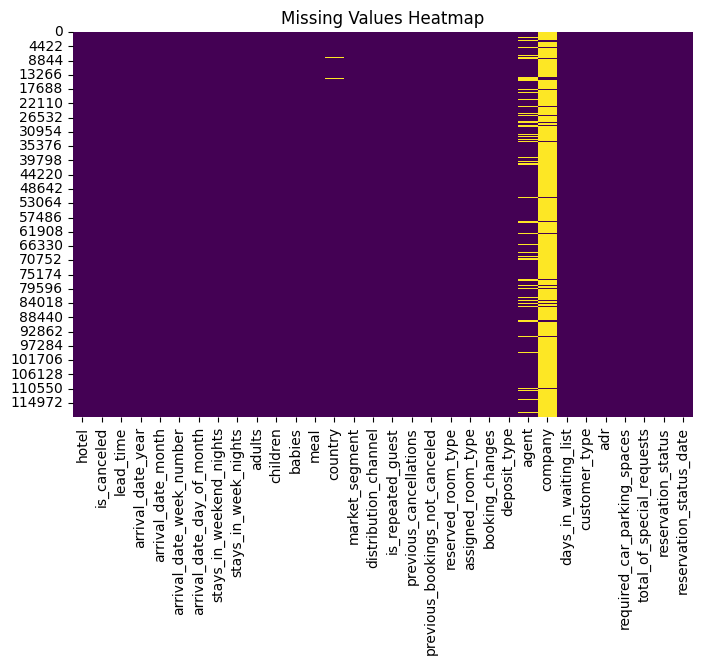

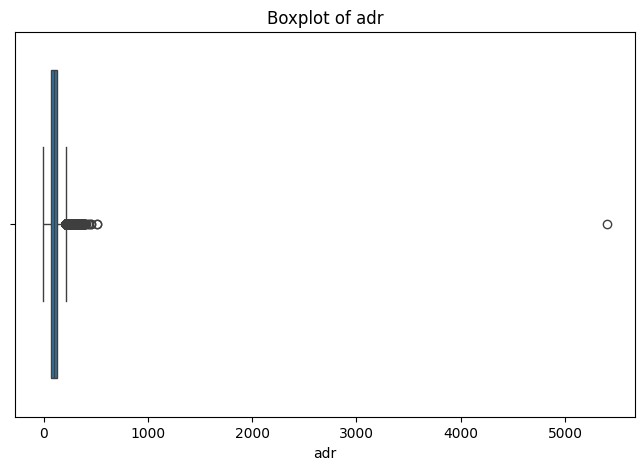

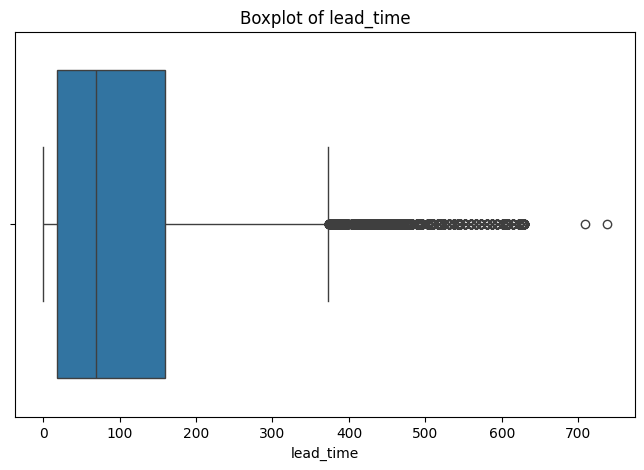

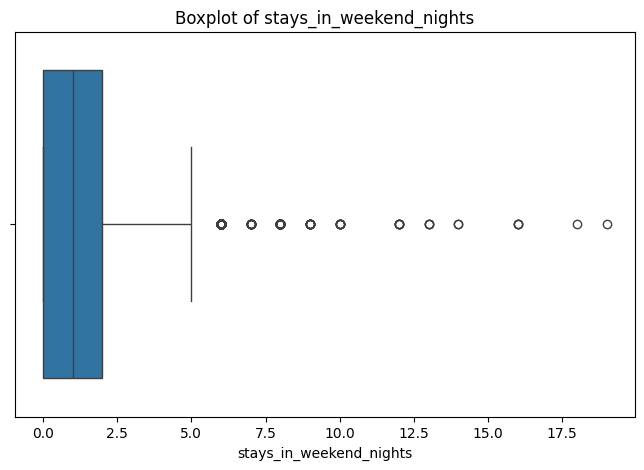

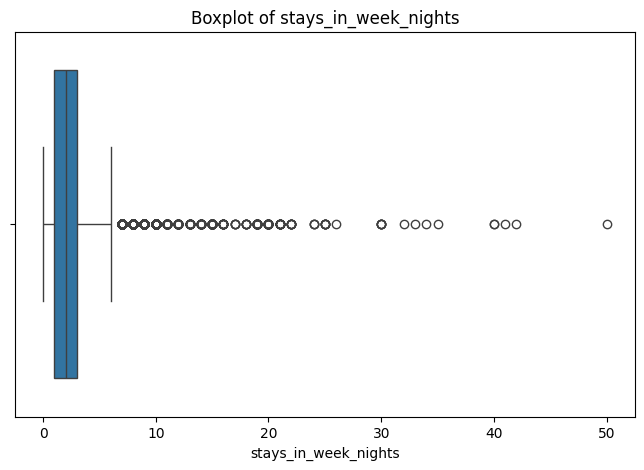

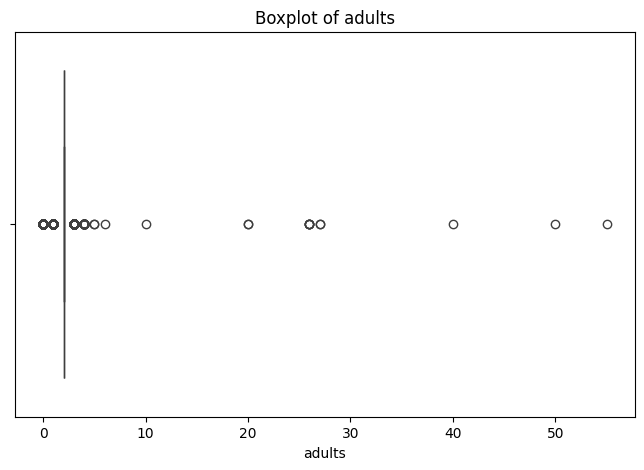

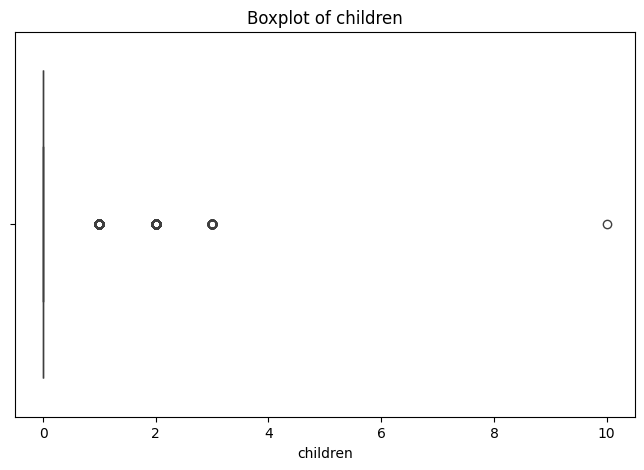

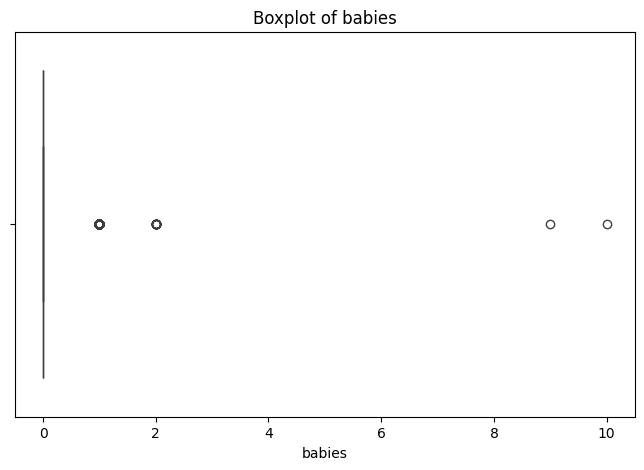

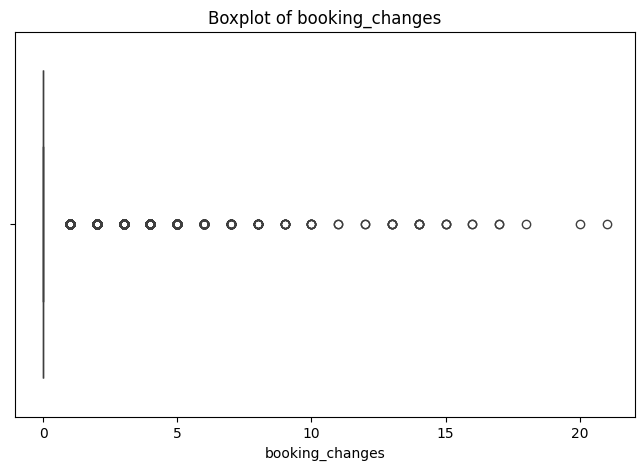

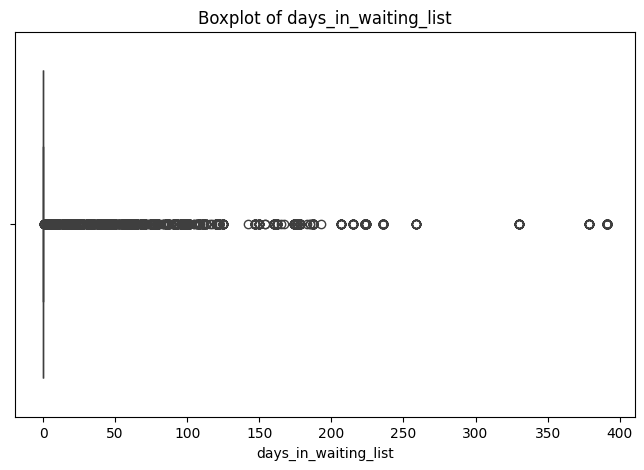

In [6]:
#visualize missing values
plt.figure(figsize=(8,5))
sns.heatmap(data=df.isnull(),cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

numerical_cols = ['adr','lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','booking_changes','days_in_waiting_list']

for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [7]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return column[(column < lower) | (column > upper)]

for col in numerical_cols:
    outliers = detect_outliers_iqr(df[col])
    print(f'{col}: {len(outliers)} outliers')


adr: 3793 outliers
lead_time: 3005 outliers
stays_in_weekend_nights: 265 outliers
stays_in_week_nights: 3354 outliers
adults: 29710 outliers
children: 8590 outliers
babies: 917 outliers
booking_changes: 18076 outliers
days_in_waiting_list: 3698 outliers


## Data Quality Report

### 1-Missing Values
- `children`: 0.34% missing values – very few, can fill with 0 or median.
- `country`: 40.87% missing values – significant portion missing; may fill with "Unknown" or drop depending on modeling needs.
- `agent`: 13.69% missing values – some bookings have no agent assigned.
- `company`: 94.31% missing values – most bookings have no company info; can consider dropping this column if not relevant.
- All other columns have no missing values.

### 2️-Outliers (Numerical Columns)
| Column | Outlier Count | Notes |
|--------|---------------|-------|
| adr | 3793 | Extremely high or negative ADR values; likely errors or special events. |
| lead_time | 3005 | Very large values for long-term bookings. |
| stays_in_weekend_nights | 265 | Unusually high number of weekend nights. |
| stays_in_week_nights | 3354 | Very high number of week nights for some bookings. |
| adults | 29710 | Possible incorrect entries (e.g., 0 or very high adults). |
| children | 8590 | Outliers may include negative, fractional, or extremely high values. |
| babies | 917 | Some extreme values present. |
| booking_changes | 18076 | Large number of booking modifications for some entries. |
| days_in_waiting_list | 3698 | Very long waiting periods for certain bookings. |


### ✅ Conclusion
The **main data quality issues** are:  
1. Missing values in key columns (`country`, `agent`, `company`, `children`).  
2. Large number of outliers in numerical columns (`adr`, `lead_time`, `adults`, `children`, `booking_changes`).  
3. Some invalid or inconsistent entries (negative ADR).  

These issues should be addressed before proceeding to modeling or further analysis.

In [8]:
#data cleaning
#handle missing values
#replace with 0
df['company'].fillna('0', inplace=True)
df['agent'].fillna('0', inplace=True)
#replace with most frequent
df['country'].fillna(df['country'].mode()[0])
#replace with median
df['children'].fillna(df['children'].median())

/tmp/ipython-input-627212977.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company'].fillna('0', inplace=True)
/tmp/ipython-input-627212977.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['company'].fillna('0', inplace=True)
/tmp/ipython-input-627212977.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series 

,children
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
119385,0.0
119386,0.0
119387,0.0
119388,0.0


In [9]:
#check duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

#drop duplicates
df = df.drop_duplicates()


Number of duplicate rows: 31994


In [10]:
#adr: cap values above 1000
df['adr'] = df['adr'].clip(upper=1000)

#lead_time: cap at 500 (arbitrary reasonable maximum)
df['lead_time'] = df['lead_time'].clip(upper=500)

#stays in week/weekend nights: cap at 14 nights
df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].clip(upper=14)
df['stays_in_week_nights'] = df['stays_in_week_nights'].clip(upper=14)

# Adults, children, babies: cap at reasonable maximum
df['adults'] = df['adults'].clip(upper=10)
df['children'] = df['children'].clip(upper=5)
df['babies'] = df['babies'].clip(upper=3)

#booking changes: cap at 10
df['booking_changes'] = df['booking_changes'].clip(upper=10)

#days in waiting list: cap at 100
df['days_in_waiting_list'] = df['days_in_waiting_list'].clip(upper=100)




In [11]:
#convert reservation_status_date to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

#if needed, arrival date columns can be combined into one date
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'].astype(str) + '-' +
                                    df['arrival_date_day_of_month'].astype(str))

#optional: convert categorical columns to 'category' type for memory efficiency
categorical_cols = ['hotel','meal','market_segment','distribution_channel','reserved_room_type',
                    'assigned_room_type','deposit_type','customer_type','reservation_status','country']
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [12]:
#create new features
#Total number of guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

#total number of nights for the stay
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

#binary flag: Yes if children or babies are included, else No
df['is_family'] = df.apply(lambda row: 'Yes' if (row['children'] > 0 or row['babies'] > 0) else 'No', axis=1)

#show first 10 rows to verify
df[['adults','children','babies','total_guests','total_nights','is_family']].head(10)

,adults,children,babies,total_guests,total_nights,is_family
0,2,0.0,0,2.0,0,No
1,2,0.0,0,2.0,0,No
2,1,0.0,0,1.0,1,No
3,1,0.0,0,1.0,1,No
4,2,0.0,0,2.0,2,No
6,2,0.0,0,2.0,2,No
7,2,0.0,0,2.0,2,No
8,2,0.0,0,2.0,3,No
9,2,0.0,0,2.0,3,No
10,2,0.0,0,2.0,4,No


In [13]:
#one-Hot Encoding for low-cardinality categories
low_card_cols = ['meal','market_segment','distribution_channel','deposit_type','is_family','customer_type']

df = pd.get_dummies(df, columns=low_card_cols, drop_first=True)


In [14]:
#high-cardinality features
high_card_cols = ['country','agent','reserved_room_type','assigned_room_type']

for col in high_card_cols:
    freq = df[col].value_counts() / len(df)
    df[col + '_freq'] = df[col].map(freq)


In [15]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type_Non Refund,deposit_type_Refundable,is_family_Yes,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,country_freq,agent_freq,reserved_room_type_freq,assigned_room_type_freq
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,False,False,False,False,True,False,0.314122,0.139514,0.010470,0.024772
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,...,False,False,False,False,True,False,0.314122,0.139514,0.010470,0.024772
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,False,False,False,False,True,False,0.119376,0.139514,0.647078,0.024772
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,False,False,False,False,True,False,0.119376,0.000011,0.647078,0.529921
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,False,False,False,False,True,False,0.119376,0.149069,0.647078,0.529921


In [16]:
# Drop columns that leak future information
df = df.drop(columns=['reservation_status', 'reservation_status_date'])

# Optional: confirm they are removed
print(df.columns)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'country',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'arrival_date', 'total_guests',
       'total_nights', 'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'market_segment_Complementary', 'market_segment_Corporate',
       'market_segment_Direct', 'market_segment_Groups',
       'market_segment_Offline TA/TO', 'market_segment_Online TA',
       'market_segment_Undefined', 'distribution_channel_Direct',
       'distribution_channel_GDS', 'distribution_channel_TA/TO',
       'distribution_ch

In [17]:
#split data
#features
X = df.drop('is_canceled', axis=1)

#target
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (69916, 52)
X_test shape: (17480, 52)
y_train shape: (69916,)
y_test shape: (17480,)
